In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Cleaning Data

In [50]:
#lire la base de données
df = pd.read_csv("C:/Users/pc/Downloads/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [51]:
df.shape

(303, 14)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [56]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

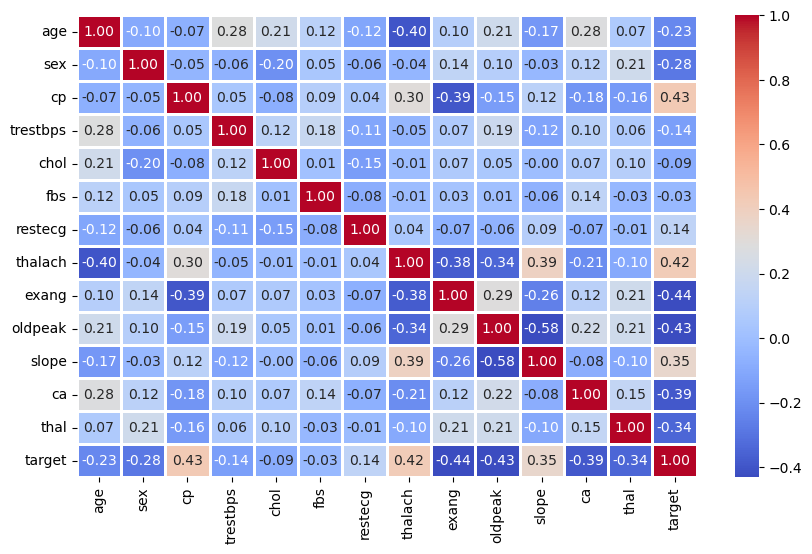

In [58]:
plt.figure(figsize=(10,6))
correlation = df.corr()
sns.heatmap(correlation,annot = True, cmap='coolwarm', linewidth=1, fmt='.2f', robust=True)

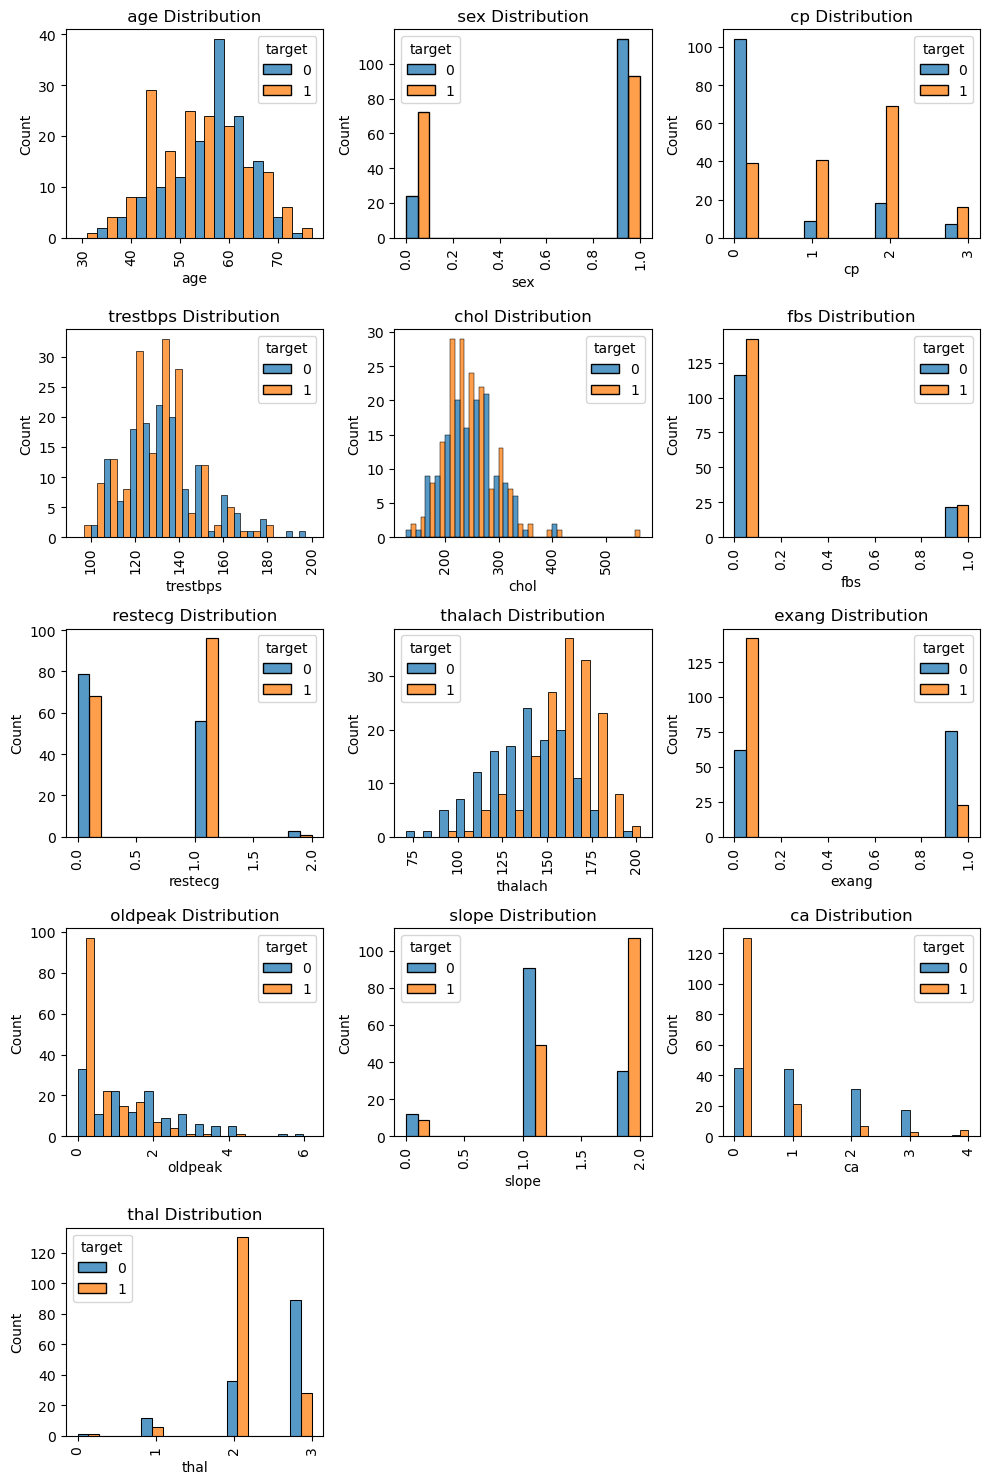

In [59]:
plt.figure(figsize = (10, 15))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(5, 3, i)
    sns.histplot(x = df[col], hue = df["target"], multiple = "dodge")
    plt.title(f" {col} Distribution ")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

In [60]:
fig1 = px.sunburst(df, path = ["target", "sex"])
fig1.update_traces(textinfo = "label + percent parent")
fig1.update_layout(title_text = "which sex likely to take heart disease",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                  width = 500, height = 500)
fig1.show()

In [61]:
fig3 = px.sunburst(df, path = ["target", "exang"])
fig3.update_traces(textinfo = "label + percent parent")
fig3.update_layout(title_text = "Exercise with angina likely to take heart disease?",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                  width = 500, height = 500)
fig3.show()

<Axes: xlabel='sex', ylabel='count'>

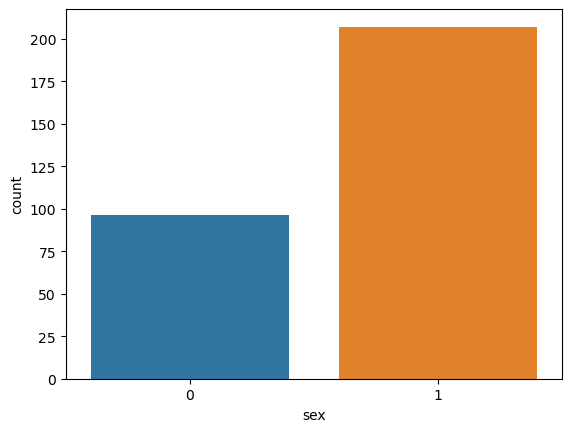

In [62]:
# visualize total count of sex
sns.countplot(x=df["sex"], data=df)

<Axes: xlabel='sex', ylabel='target'>

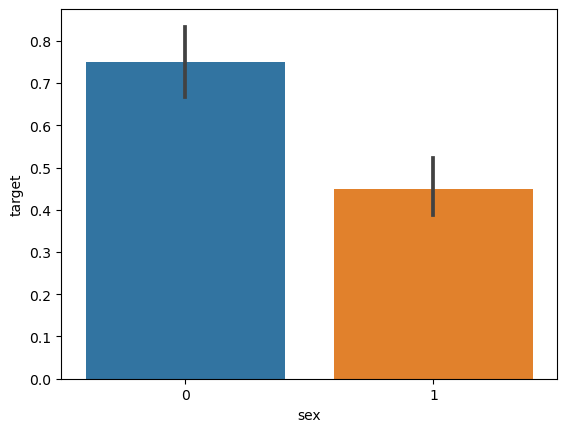

In [63]:
sns.barplot(x=df["sex"], y=df["target"], data=df)

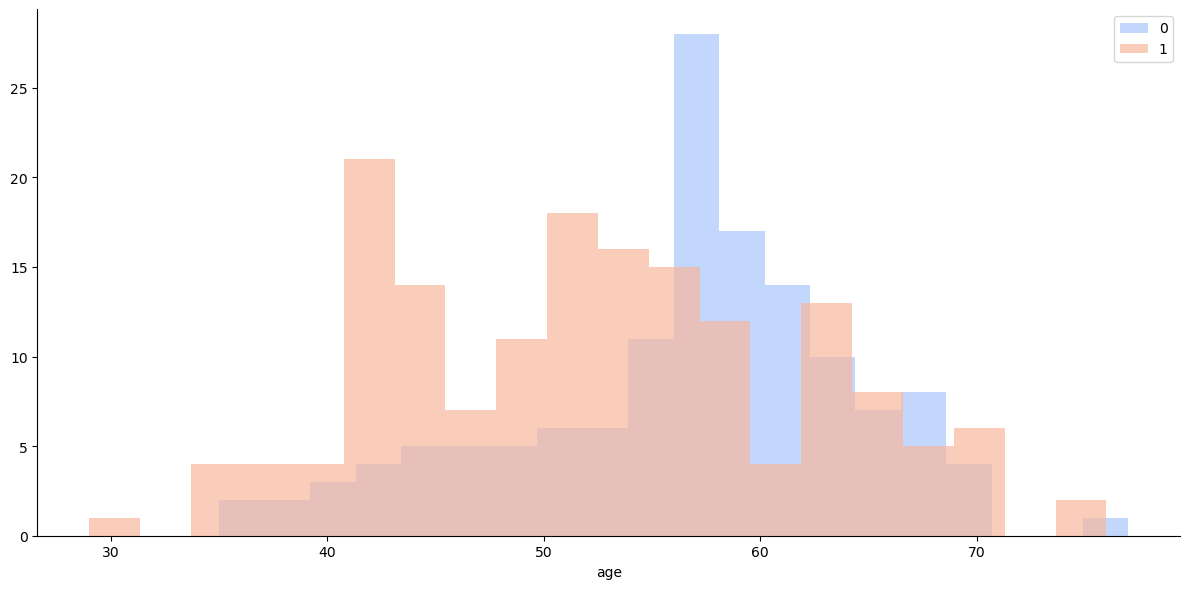

In [64]:
g = sns.FacetGrid(df, hue="target", palette="coolwarm", height=6, aspect=2)
g.map(plt.hist, 'age', bins=20, alpha=0.7)
plt.legend()

In [65]:
# lets split the dataset
X = df.drop("target", axis=1)
y = df["target"]

In [66]:
X.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Split the data 

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [68]:
# length of train and test
print(len(X_train))
print(len(X_test))

212
91


# KNN Regression 

Confusion Matrix:
 [[24 17]
 [14 36]]

Accuracy: 0.6593406593406593
Precision: 0.5853658536585366
Recall: 0.631578947368421
F1-score: 0.6075949367088608


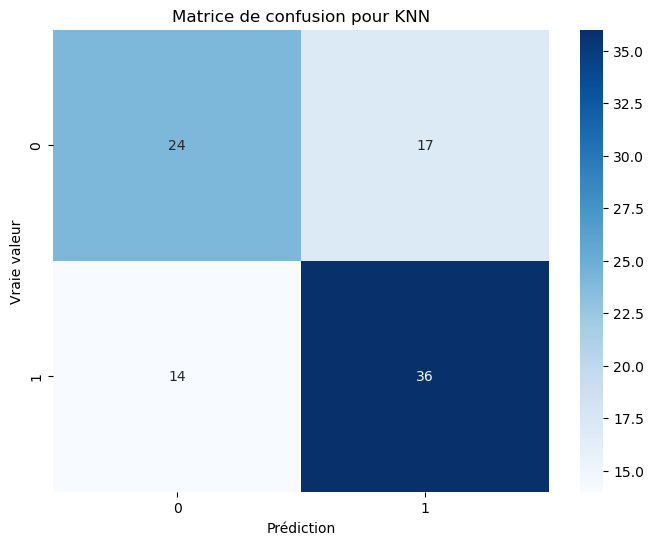

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create the KNN classifier (adjust k value as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Calculate additional metrics from the confusion matrix
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score_value = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_value)

# Affichage de la matrice de confusion pour KNN avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap (cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de confusion pour KNN')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

In [70]:
X_train.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h1>Logistic Regression</h1>

In [72]:

# Create the KNN classifier (adjust k value as needed)
Lr = LogisticRegression()
# Train the KNN model
Lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Lr.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Calculate additional metrics from the confusion matrix
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score_value = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_value)



Confusion Matrix:
 [[32  9]
 [ 8 42]]

Accuracy: 0.8131868131868132
Precision: 0.7804878048780488
Recall: 0.8
F1-score: 0.7901234567901235


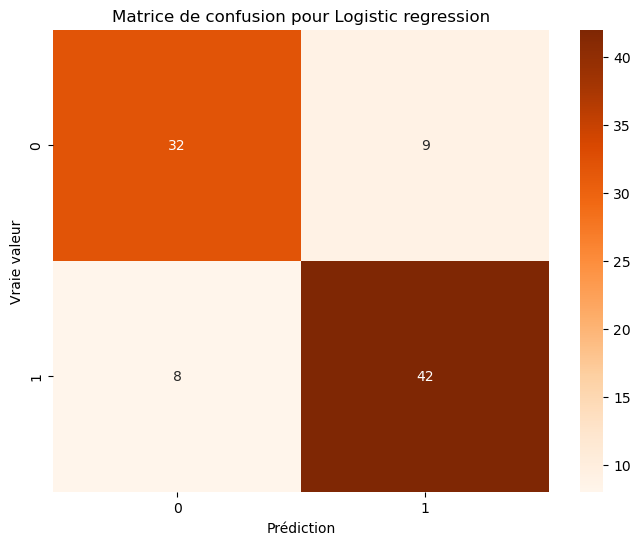

In [73]:
# Affichage de la matrice de confusion pour KNN avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap (cm, annot=True, cmap='Oranges', fmt='g')
plt.title('Matrice de confusion pour Logistic regression')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

In [74]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Decision_Tree

Confusion Matrix:
 [[32  9]
 [16 34]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        41
           1       0.79      0.68      0.73        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.73        91


Accuracy: 0.7252747252747253
Precision: 0.7804878048780488
Recall: 0.6666666666666666
F1-score: 0.7191011235955055


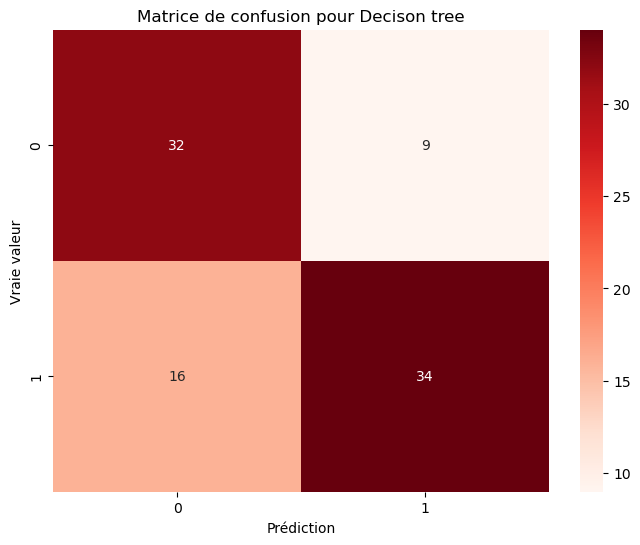

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report

# Create the KNN classifier (adjust k value as needed)
decision_tree = DecisionTreeClassifier()

# Train the KNN model
decision_tree .fit(X_train, y_train)

# Make predictions on the test set
y_pred =decision_tree.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)
print(classification_report(y_test,y_pred))
# Calculate additional metrics from the confusion matrix
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score_value = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_value)


# Affichage de la matrice de confusion pour KNN avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap (cm, annot=True, cmap='Reds', fmt='g')
plt.title('Matrice de confusion pour Decison tree')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

# CROSS VALIDATION

# KNN CROSS VALIDATION

In [76]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# parametres a tester de GridSearchCV pour KNN 
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Adjust the number of neighbors
    'weights': ['uniform', 'distance']
}

# execution de  GridSearchCV avec cross-validation
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# obtenir le meilleur modele KNN 
best_knn_model = grid_search_knn.best_estimator_

# Evaluation du meilleur modele KNN avec  cross-validation
knn_cv_score = cross_val_score(best_knn_model, X_train, y_train, cv=5)
print("Score de Cross-Validation du meilleur model KNN :", knn_cv_score)
print("Moyenne des scores de Cross-Validation :", knn_cv_score.mean())
# Bagging pour creation d'un ensemble de modeles 
bagging_classifier = BaggingClassifier(estimator=best_knn_model, n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_cv_score = cross_val_score(bagging_classifier, X_train, y_train, cv=5)
print("Score de Cross-Validation de Bagging Classifier:", bagging_cv_score)
print("Moyenne des scores de Cross-Validation :", bagging_cv_score.mean())
# parametres a tester pour le modele boosting
param_grid_boosting = {
    'n_estimators': [50, 100, 200],  # Adjust the number of estimators
    'learning_rate': [0.01, 0.1, 0.2],  # Adjust the learning rate
    'max_depth': [3, 5, 7]  # Adjust the maximum depth
}

# modele de boosting pour la classification 
boosting_model = GradientBoostingClassifier()

#Exécution de GridSearchCV avec cross validation  pour GradientBoostingClassifier
grid_search_boosting.fit(X_train, y_train)

# obtenir le meilleur modele GradientBoostingClassifier 
best_boosting_model = grid_search_boosting.best_estimator_

# Evaluate the best GradientBoostingClassifier model using cross-validation
boosting_cv_score = cross_val_score(best_boosting_model, X_train, y_train, cv=5)
print("Score de Cross-Validation du meilleur modele Boosting :",boosting_cv_score )
print("Moyenne des scores de Cross-Validation:",boosting_cv_score.mean() )

Score de Cross-Validation du meilleur model KNN : [0.72093023 0.6744186  0.64285714 0.57142857 0.73809524]
Moyenne des scores de Cross-Validation : 0.6695459579180509
Score de Cross-Validation de Bagging Classifier: [0.69767442 0.69767442 0.64285714 0.57142857 0.66666667]
Moyenne des scores de Cross-Validation : 0.6552602436323366
Score de Cross-Validation du meilleur modele Boosting : [0.86046512 0.79069767 0.71428571 0.88095238 0.78571429]
Moyenne des scores de Cross-Validation: 0.8064230343300111


# Log Regression CROSS VALIDATION

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Définition de la grille des paramètres pour la régression logistique
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  # Régularisation (val petite -> regularisation forte)
    'penalty': ['l1', 'l2']  # Type de régularisation : Lasso (l1) ou Ridge (l2)
}

# Initialisation du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=5)
grid_search_logistic.fit(X_train, y_train)

# Obtention du meilleur modèle de régression logistique
best_logistic_model = grid_search_logistic.best_estimator_

# Évaluation du meilleur modèle avec validation croisée
logistic_cv_score = cross_val_score(best_logistic_model, X_train, y_train, cv=5)
print("Score de validation croisée du meilleur modèle de régression logistique:",logistic_cv_score )
print("Détails des scores de validation croisée:", logistic_cv_score.mean())

Score de validation croisée du meilleur modèle de régression logistique: 0.8251384274640088
Détails des scores de validation croisée: [0.88372093 0.8372093  0.71428571 0.92857143 0.76190476]


In [78]:

# Bagging
bagging_classifier = BaggingClassifier(estimator=best_logistic_model, n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_cv_score = cross_val_score(bagging_classifier, X_train, y_train, cv=5)
print("Score de validation croisée du classifieur de bagging:", bagging_cv_score.mean())
print("Détails des scores de validation croisée du classifieur de bagging:", bagging_cv_score)


Score de validation croisée du classifieur de bagging: 0.8299003322259135
Détails des scores de validation croisée du classifieur de bagging: [0.88372093 0.8372093  0.73809524 0.92857143 0.76190476]


In [79]:
# Boosting
param_grid_boosting = {
    'n_estimators': [50, 100, 200],  # Nombre d'estimateurs
    'learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'max_depth': [3, 5, 7]  # Profondeur maximale de l'arbre
}

boosting_model = GradientBoostingClassifier()

grid_search_boosting = GridSearchCV(estimator=boosting_model, param_grid=param_grid_boosting, cv=5)
grid_search_boosting.fit(X_train, y_train)

best_boosting_model = grid_search_boosting.best_estimator_

boosting_cv_score = cross_val_score(best_boosting_model, X_train, y_train, cv=5)
print("Score de validation croisée du meilleur modèle de boosting:", boosting_cv_score.mean())
print("Détails des scores de validation croisée du meilleur modèle de boosting:", boosting_cv_score)

Score de validation croisée du meilleur modèle de boosting: 0.8111849390919158
Détails des scores de validation croisée du meilleur modèle de boosting: [0.86046512 0.79069767 0.73809524 0.88095238 0.78571429]


# Decision Tree CROSS VALIDATION

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Définition de la grille des paramètres pour l'arbre de décision
param_grid_decision_tree = {
    'max_depth': [3, 5, 7, None],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4]  # Nombre minimal d'échantillons requis pour être une feuille
}

# Initialisation du modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search_decision_tree = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)

# Obtention du meilleur modèle d'arbre de décision
best_decision_tree_model = grid_search_decision_tree.best_estimator_

# Évaluation du meilleur modèle avec validation croisée
decision_tree_cv_score = cross_val_score(best_decision_tree_model, X_train, y_train, cv=5)
print("Score de validation croisée du meilleur modèle d'arbre de décision:", decision_tree_cv_score.mean())
print("Détails des scores de validation croisée:", decision_tree_cv_score)

# Bagging
bagging_classifier = BaggingClassifier(estimator=best_decision_tree_model, n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_cv_score = cross_val_score(bagging_classifier, X_train, y_train, cv=5)
print("Score de validation croisée du classifieur de bagging:", bagging_cv_score.mean())
print("Détails des scores de validation croisée du classifieur de bagging:", bagging_cv_score)

# Boosting
param_grid_boosting = {
    'n_estimators': [50, 100, 200],  # Nombre d'estimateurs
    'learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'max_depth': [3, 5, 7]  # Profondeur maximale de l'arbre
}

boosting_model = GradientBoostingClassifier()

grid_search_boosting = GridSearchCV(estimator=boosting_model, param_grid=param_grid_boosting, cv=5)
grid_search_boosting.fit(X_train, y_train)

best_boosting_model = grid_search_boosting.best_estimator_

boosting_cv_score = cross_val_score(best_boosting_model, X_train, y_train, cv=5)
print("Score de validation croisée du meilleur modèle de boosting:", boosting_cv_score.mean())
print("Détails des scores de validation croisée du meilleur modèle de boosting:", boosting_cv_score)


Score de validation croisée du meilleur modèle d'arbre de décision: 0.839424141749723
Détails des scores de validation croisée: [0.88372093 0.8372093  0.78571429 0.88095238 0.80952381]
Score de validation croisée du classifieur de bagging: 0.7971207087486157
Détails des scores de validation croisée du classifieur de bagging: [0.8372093  0.76744186 0.73809524 0.85714286 0.78571429]
Score de validation croisée du meilleur modèle de boosting: 0.8111849390919158
Détails des scores de validation croisée du meilleur modèle de boosting: [0.86046512 0.79069767 0.73809524 0.88095238 0.78571429]


# TEST

In [81]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Définition du modèle de régression logistique
logistic_regression_model = LogisticRegression(max_iter=1000)  # Vous pouvez ajuster les hyperparamètres au besoin

# Entraînement du modèle avec l'ensemble de données complet (X et y)
logistic_regression_model.fit(X_train, y_train)

# Fonction pour recueillir les données de l'utilisateur et faire des prédictions
def make_prediction():
    # Définition des noms de colonnes
    column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
    
    # Demande à l'utilisateur de saisir les valeurs pour chaque colonne
    user_input = []
    for col_name in column_names:
        value = input(f"Entrez la valeur pour '{col_name}': ")
        user_input.append(float(value))
    
    # Transformation de la liste en un tableau 2D (1 ligne)
    new_input = np.array(user_input).reshape(1, -1)
    
    # Créer un DataFrame pandas pour les données de test avec les mêmes noms de colonnes que les données d'entraînement
    X_test_with_columns = pd.DataFrame(new_input, columns=column_names)
    
    # Prédiction avec le modèle en utilisant les données de test avec les noms de colonnes
    prediction = logistic_regression_model.predict(X_test_with_columns)
    
    # Affichage du résultat de la prédiction
    if prediction[0] == 1:
        print("La personne est susceptible d'avoir une crise cardiaque.")
    else:
        print("La personne n'est probablement pas susceptible d'avoir une crise cardiaque.")

# Appel de la fonction pour faire une prédiction
make_prediction()


Entrez la valeur pour 'age': 22
Entrez la valeur pour 'sex': 23
Entrez la valeur pour 'cp': 44
Entrez la valeur pour 'trestbps': 12
Entrez la valeur pour 'chol': 78
Entrez la valeur pour 'fbs': 53
Entrez la valeur pour 'restecg': 67
Entrez la valeur pour 'thalach': 90
Entrez la valeur pour 'exang': 43
Entrez la valeur pour 'oldpeak': 23
Entrez la valeur pour 'slope': 56
Entrez la valeur pour 'ca': 67
Entrez la valeur pour 'thal': 88
La personne n'est probablement pas susceptible d'avoir une crise cardiaque.


In [83]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import numpy as np
from sklearn.linear_model import LogisticRegression

# Définition du modèle de régression logistique
logistic_regression_model = LogisticRegression(max_iter=1000)  # Vous pouvez ajuster les hyperparamètres au besoin

def train_logistic_regression_model(X_train, y_train):
    # Entraîner le modèle de régression logistique
    logistic_regression_model.fit(X_train, y_train)

def make_prediction():
    # Vérifier si le modèle a été entraîné
    if not hasattr(logistic_regression_model, 'coef_'):
        messagebox.showerror("Erreur", "Le modèle de régression logistique n'a pas été entraîné.")
        return
    
    # Récupération des données saisies par l'utilisateur depuis les attributs de l'instance de la classe MainWindow
    user_input = [float(entry.get()) for entry in app.entries]
    
    # Transformation des données en un tableau 2D (1 ligne)
    new_input = np.array(user_input).reshape(1, -1)
    
    # Prédiction avec le modèle
    prediction = logistic_regression_model.predict(new_input)
    
    # Affichage du résultat de la prédiction
    if prediction[0] == 1:
        messagebox.showinfo("Résultat de la prédiction", "La personne est susceptible d'avoir une crise cardiaque.")
    else:
        messagebox.showinfo("Résultat de la prédiction", "La personne n'est probablement pas susceptible d'avoir une crise cardiaque.")

class MainWindow:
    def __init__(self, master):
        self.master = master
        self.master.geometry("700x700+10+10")
        self.master.title("Prédiction de crise cardiaque")
        self.master.configure(bg='white')

        # Création du canevas pour l'image
        self.canvas = tk.Canvas(self.master, width=700, height=620)
        self.canvas.pack()

        # Création des étiquettes et des champs de saisie pour chaque caractéristique
        self.labels = ['Age', 'Sexe', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal']
        self.entries = []

        # Centrer le formulaire dans l'image
        form_width = 300  # Largeur du formulaire
        form_height = len(self.labels) * 40 + 50  # Hauteur du formulaire

        # Charger l'image en arrière-plan du canevas
        try:
            self.img = ImageTk.PhotoImage(Image.open("C:/Users/pc/Downloads/heart.jpg").resize((700, 800)))
        except FileNotFoundError:
            # Si l'image n'est pas trouvée, utilisez une image blanche par défaut
            self.img = ImageTk.PhotoImage(Image.new('RGB', (580, 500), 'white'))

        # Afficher l'image sur le canevas
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.img)

        image_width = self.img.width()
        image_height = self.img.height()

        x_offset = (image_width - form_width) // 2
        y_offset = (image_height - form_height) // 2 - 70  # Décalage vers le haut
        # Décalage horizontal et vertical pour le bouton
        x_offset_button = x_offset + 25  # Décalage vers la gauche
        y_offset_button = y_offset - 20  # Décalage vers le haut

        for i, label_text in enumerate(self.labels):
            # Afficher le texte directement sur l'image avec une police et une couleur spécifiques
            label_window = self.canvas.create_text(x_offset, y_offset + i*40, anchor=tk.NW, text=label_text, font=("Arial", 15, "bold"), fill="white")
            entry = tk.Entry(self.canvas)
            entry_window = self.canvas.create_window(x_offset + 100, y_offset + i*40, anchor=tk.NW, window=entry)
            self.entries.append(entry)

            # Dessiner un cadre rouge autour du texte avec les coins arrondis et fond rouge derrière le texte
            label_bbox = self.canvas.bbox(label_window)
            padding = 5  # Padding autour du texte
            rect_coords = (label_bbox[0] - padding, label_bbox[1] - padding, label_bbox[2] + padding, label_bbox[3] + padding)
            rectangle = self.canvas.create_rectangle(rect_coords, outline="red", fill="red", width=0)
            self.canvas.tag_lower(rectangle)  # Mettre le rectangle derrière le texte
       
        # Bouton pour faire la prédiction avec style personnalisé
        predict_button = tk.Button(self.canvas, text="Faire la prédiction", command=make_prediction, bg="red", fg="white", font=("Arial", 14), relief=tk.FLAT, borderwidth=5)
        predict_button_window = self.canvas.create_window(x_offset_button, y_offset_button + len(self.labels)*40 + 20, anchor=tk.NW, window=predict_button)

if __name__ == "__main__":
    root = tk.Tk()
    app = MainWindow(root)
    # Ici, vous devez fournir les données d'entraînement appropriées (X_train, y_train)
    train_logistic_regression_model(X_train, y_train)
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\pc\AppData\Local\Temp\ipykernel_20956\3785366570.py", line 21, in make_prediction
    user_input = [float(entry.get()) for entry in app.entries]
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\AppData\Local\Temp\ipykernel_20956\3785366570.py", line 21, in <listcomp>
    user_input = [float(entry.get()) for entry in app.entries]
                  ^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'xsd'
